<a href="https://colab.research.google.com/github/nayankr8625/Health-Insurance-Cross-Sell-Prediction/blob/master/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Importing Required Libraries

In [ ]:
!pip install sidetable --quiet

In [ ]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

from scipy import stats as st

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# sidetable is a super-charged version of pandas value_counts with a little bit of crosstab mixed in
import sidetable as stb

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
# Pre-defining the color schema
sns.set_palette('gist_ncar')

In [ ]:
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Dataset from csv file

In [ ]:
# Using pandas read_csv method to load the data
path = '/content/drive/MyDrive/Health_Insurance_Cross_Sell_Prediction_Capstone/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
data = pd.read_csv(path)

### Getting the first 5 rows of the data.

In [ ]:
# using pandas head function.

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Getting the last 5 rows of the data.

In [ ]:
# using pandas tail function.

data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Getting the columns present in our data.

In [ ]:
# using pandas columns method

print('Columns in our data:')
data.columns.tolist()

Columns in our data:


['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

### Getting the shape of the data.

In [ ]:
# using pandas shape method to get the shape of our dataset

print('Shape of our dataset : ')
data.shape

Shape of our dataset : 


(381109, 12)

In [ ]:
print('Number of columns : ',data.shape[1],'\n')

print('number of rows : ',data.shape[0])

Number of columns :  12 

number of rows :  381109


* <b>Checking the data types of each column</b>

In [ ]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

### Getting the type of data present in columns.

In [ ]:
# printing the number of numerical features and number of categorical features 

num_col = data.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 9

The number of Categorical columns are: 3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Summary Statistic of the numeric columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


#### Summary Statistic of object form data of columns

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [ ]:
# In our dataset there are lots of unique values in lots of columns 
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(data[column].unique()) for column in data.columns}

In [ ]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [ ]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,Gender,2
1,Driving_License,2
2,Previously_Insured,2
3,Vehicle_Damage,2
4,Response,2
5,Vehicle_Age,3
6,Region_Code,53
7,Age,66
8,Policy_Sales_Channel,155
9,Vintage,290


### Data Cleaning and Removal of duplicate enteries from the Data

As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:


* Getting missing data
* Handling missing data
* Checking for duplicate data
* Removing duplicate data

In [ ]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and 
# sum() is use to get the sum of missing values present in each column in dataset

print(data.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


# Inference

* Here we can see that there is <b>no missing value</b> in any feature of our data.


* So we donot need to perform the missing value handling task

* <b>Checking for duplicate data</b>

In [ ]:
data[data.duplicated()].size

0

* There is also <b>not any duplicate data</b> present in our dataset.

# Exploratory Data Analysis

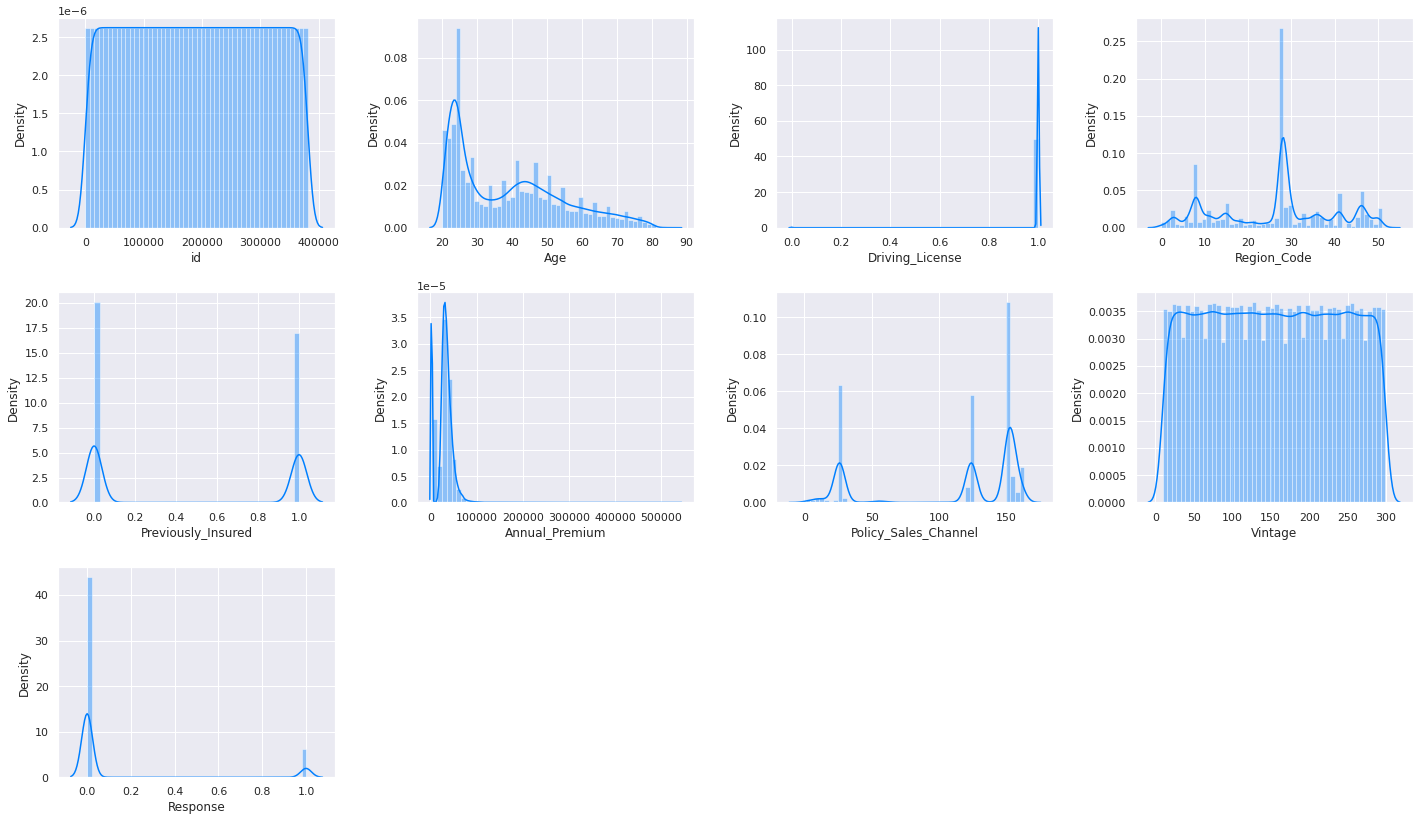

In [ ]:
# ploting distribution for each numerical variable present in our data set
# using distplot from seaborn

columns = data.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:   
    
    plt.subplot(4,4,n)
    
    n = n+1
    sns.distplot(data[column])
    
    plt.tight_layout()

### Inference :
* The above graphic suggests that the distribution of the annual premium is positively biassed.

* We can also see that Vintage has a rather uniform distribution from above.

### Outlier Detection

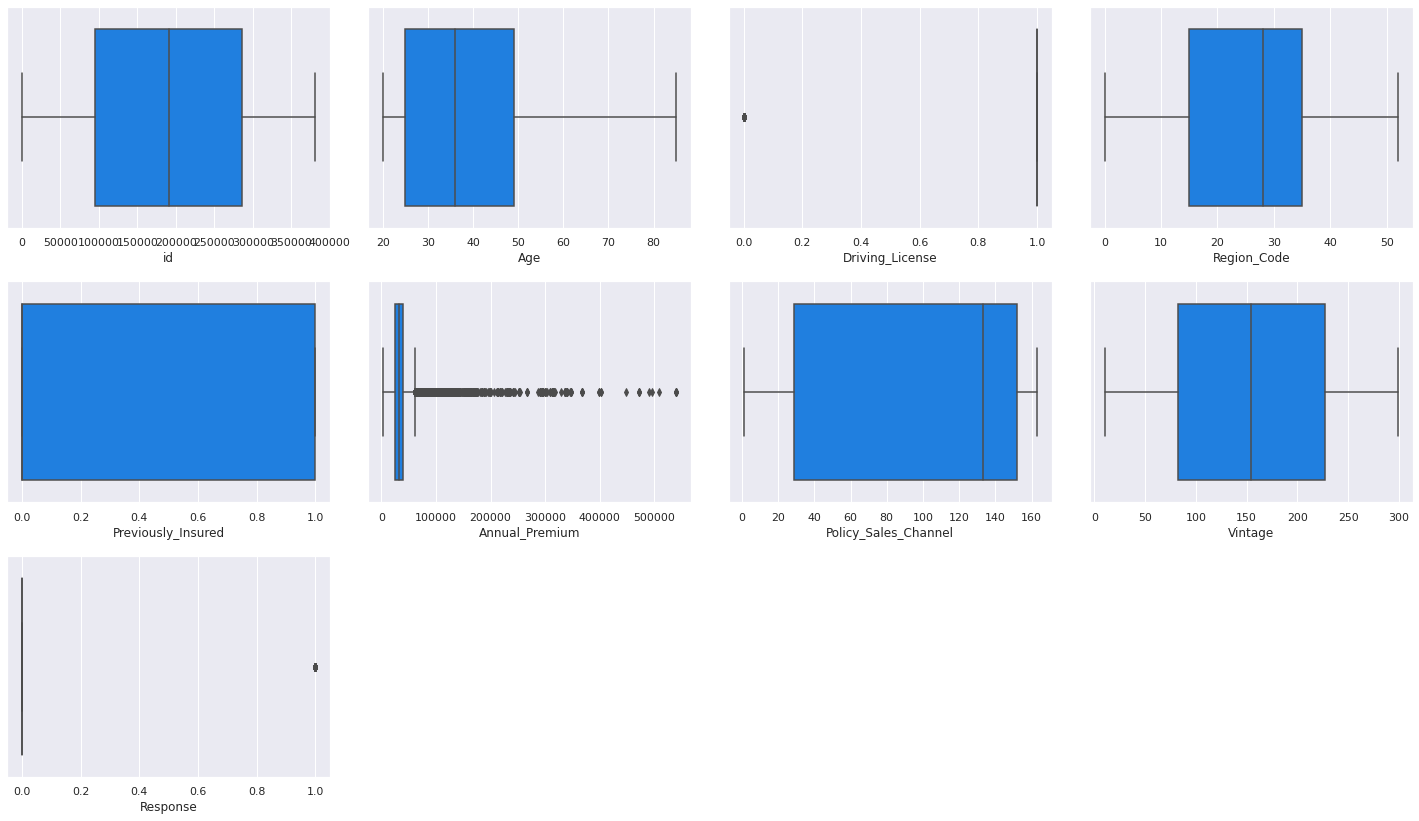

In [ ]:
# ploting the box plots into subplots of each column

columns = data.select_dtypes(include=np.number).columns.tolist()
n = 1

plt.figure(figsize=(20,15))

for column in columns:
    plt.subplot(4,4,n)
    n = n+1
    sns.boxplot(data[column])
    plt.tight_layout()
    

### Inference :

* There are some outliers in the age columns, but we won't deal with them because they won't have an impact on the outcome. 

## Univariate Analysis

* <b>Let us go through variables individually and analyse them.</b>

#### Gender Column

In [ ]:
# Getting the value count for each gender using value_counts from pandas
data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
# Percentage For Response Column
(data['Gender'].value_counts() / data['Gender'].count()) * 100

Male      54.07613
Female    45.92387
Name: Gender, dtype: float64

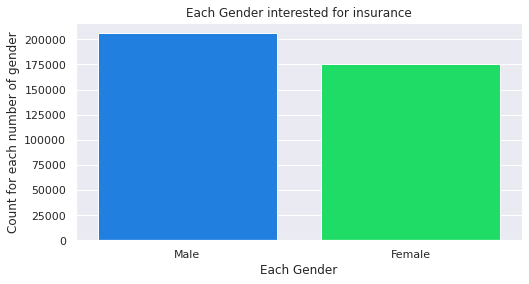

In [ ]:
# Ploting count plot for gender column

plt.figure(figsize = (8, 4))

sns.countplot(data['Gender'])

plt.title('Each Gender interested for insurance')

plt.xlabel('Each Gender')
plt.ylabel('Count for each number of gender')

plt.show()

### Inference :
* we see that Males are more interested in buying a insurance rather than females

#### Age Column

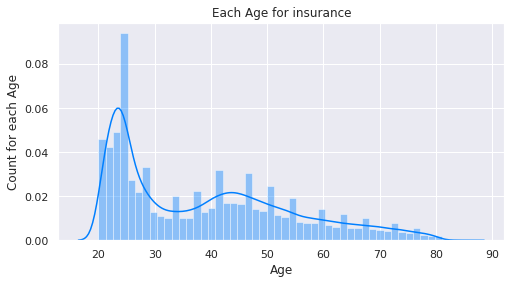

In [ ]:
# Getting the Age column analysis
# Ploting Distribution plot for Age column

plt.figure(figsize = (8, 4))

sns.distplot(data['Age'])

plt.title('Each Age for insurance')

plt.xlabel('Age')
plt.ylabel('Count for each Age')

plt.show()

### Inference :

* As Age column is not following proper uniform distribution as it is skewed to the right and also it indicates that the people of older age are more wiling to buy an insuarance

#### Driving License Column

In [ ]:
# Getting the value count for each Driving License using value_counts from pandas
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

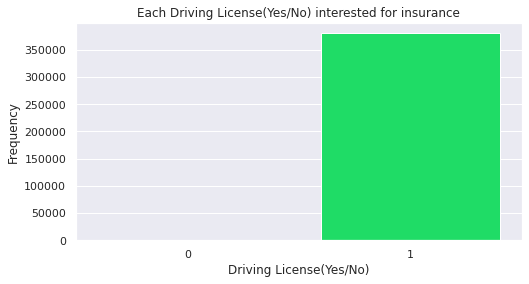

In [ ]:
# Ploting count plot for Driving License column

plt.figure(figsize = (8, 4))

sns.countplot(data['Driving_License'])

plt.title('Each Driving License(Yes/No) interested for insurance')

plt.xlabel('Driving License(Yes/No)')
plt.ylabel('Frequency')

plt.show()

#### Inference :
* As we can see that if there is a license holder than it will be more likely to buy an insurance.
* Also there is very less count of People who donot have driving license.

#### Region Code Column

In [ ]:
# Getting the value count for each Driving License using value_counts from pandas
data['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

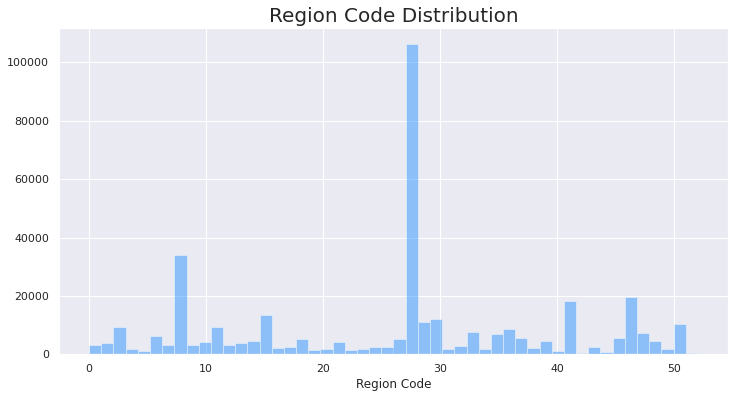

In [ ]:
# Ploting Distribution plot using Seaborn

plt.figure(figsize = (12,6))

sns.distplot(data['Region_Code'], kde = False)

plt.xlabel('Region Code')

plt.title('Region Code Distribution', fontsize = 20)

plt.show()

### Inference :

* Area code 28 has the most health insurance clients and region code 51 has the fewest. 
* As this <b>Region_Code</b> column seems like an categorical column as it has different types of region codes so we will treat it into data_preprocessing part.

#### Previously Insured

In [ ]:
# Getting the value count for each Previously Insured using value_counts from pandas
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [ ]:
# Percentage For Previously Insured and not previously Insured person
(data['Previously_Insured'].value_counts() / data['Previously_Insured'].count()) * 100

0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64

* We can see that only 5% of defference is there.
* <b>But it also indicate that more than 50% of people doesn't have insurance.</b>

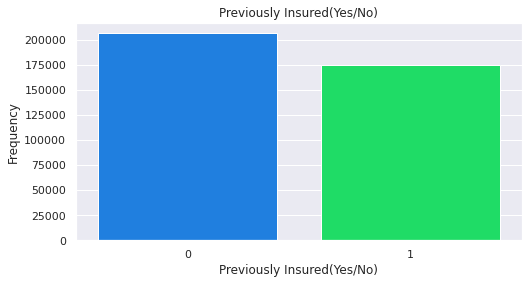

In [ ]:
# Ploting count plot for Previously Insured column

plt.figure(figsize = (8, 4))

sns.countplot(data['Previously_Insured'])

plt.title('Previously Insured(Yes/No)')

plt.xlabel('Previously Insured(Yes/No)')
plt.ylabel('Frequency')

plt.show()

### Inference :
* We can see that there is almost no effect on insurance buy if a person is already having a insuarance or not
* But if we consider more about it then the person who doesn't have any insaurance previously than the person will more like to get an insaurance

#### Vehicle Age Column

In [ ]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
# Percentage For Vechile Age
(data['Vehicle_Age'].value_counts() / data['Vehicle_Age'].count()) * 100

1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: Vehicle_Age, dtype: float64

* <b>95 percent of health insurance consumers own a vehicle that is less than two years old.</b>

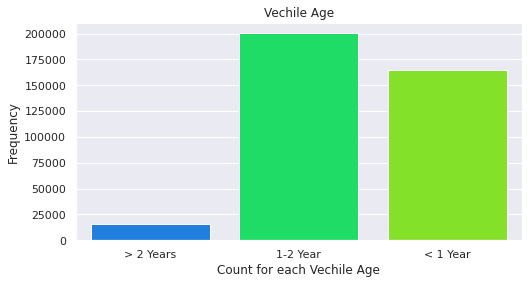

In [ ]:
# Ploting count plot for Vechile Age column

plt.figure(figsize = (8, 4))

sns.countplot(data['Vehicle_Age'])

plt.title('Vechile Age')

plt.xlabel('Count for each Vechile Age')
plt.ylabel('Frequency')

plt.show()

### Inference :
* We can see that vechel age between 1-2 years have the most number of counts and vechile age less than 2 years has the least count.

#### This Vehicle Age is an type of an categorical variable let us convert it to numeric using labelencoder ffrom sklearn

In [ ]:
# importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['Vehicle_Age'])
 
# printing label
label

array([2, 0, 2, ..., 1, 2, 0])

In [ ]:
data['Vehicle_Age'] = label
print(data.dtypes)
print('\nCount For Each Vehicle Age')
data['Vehicle_Age'].value_counts()


id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Count For Each Vehicle Age


0    200316
1    164786
2     16007
Name: Vehicle_Age, dtype: int64

* Here we have successfully converted <b>Vechile Age</b> column into numeric column.

* 0 ---> 1-2 Year

* 1 ---> < 1 Year

* 2 ---> > 2 Year

#### Vehicle Damage Column

In [ ]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
# Percentage For Vechile Damage
(data['Vehicle_Damage'].value_counts() / data['Vehicle_Damage'].count()) * 100

Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64

* <b>Half of all health insurance customers have had their car destroyed, while the other half have not.</b>

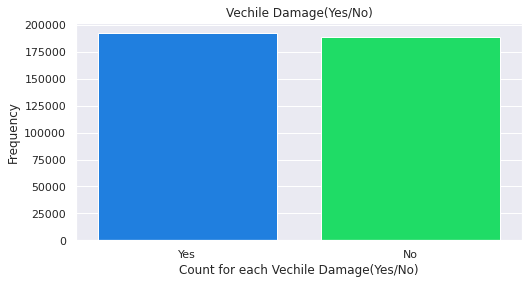

In [ ]:
# Ploting count plot for Vechile Age column

plt.figure(figsize = (8, 4))

sns.countplot(data['Vehicle_Damage'])

plt.title('Vechile Damage(Yes/No)')

plt.xlabel('Count for each Vechile Damage(Yes/No)')
plt.ylabel('Frequency')

plt.show()

### Inference :
* Here this count plot is shoeing that there is almost equal count for both the Vehicle property based on damage.

#### This Vehicle Age is also an type of categorical variable let us convert it to numeric using labelencoder from sklearn

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['Vehicle_Damage'])
 
# printing label
label

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
data['Vehicle_Damage'] = label
print(data.dtypes)
print('\nCount For Each Vehicle Damage')
data['Vehicle_Damage'].value_counts()


id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Count For Each Vehicle Damage


1    192413
0    188696
Name: Vehicle_Damage, dtype: int64

* Here we have successfully converted <b>Vechile Damage</b> column into numeric column.

* 0 ---> No

* 1 ---> Yes

#### Response Column

In [ ]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
# Percentage For Response Column
(data['Response'].value_counts() / data['Response'].count()) * 100

0    87.743664
1    12.256336
Name: Response, dtype: float64

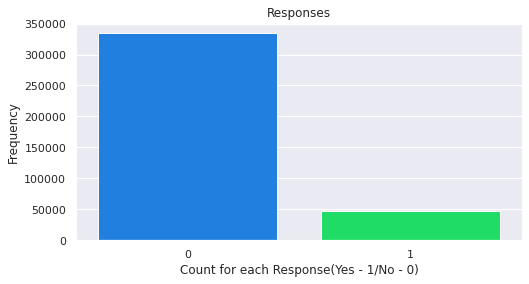

In [ ]:
# Ploting count plot for Vechile Age column

plt.figure(figsize = (8, 4))

sns.countplot(data['Response'])

plt.title('Responses')

plt.xlabel('Count for each Response(Yes - 1/No - 0)')
plt.ylabel('Frequency')

plt.show()

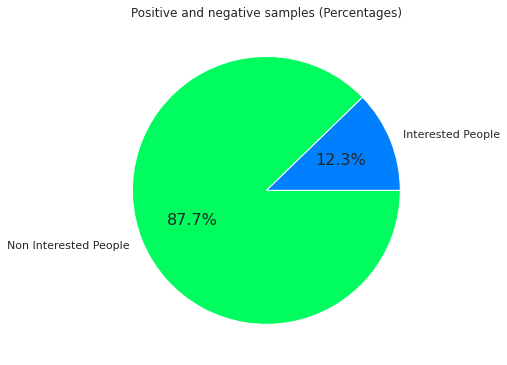

In [ ]:
#Calculating percentages of interested and non interested people for insuarance

int_percntg = abs(len(data[data['Response'] == 1])/len(data)*100)

non_int_percntg = abs(len(data[data['Response'] == 0])/len(data)*100)

total_prcntg = [int_percntg, non_int_percntg]

# Creating a pie chart
plt.figure(figsize = (6,8))

plt.pie(total_prcntg, labels = ['Interested People','Non Interested People'], autopct = '%.1f%%')

plt.title('Positive and negative samples (Percentages)')

plt.show()

* <b> Only 12% are interested in purchasing vehicle insurance.</b>


* <b>This is also showing the data imbalance as our response as yes is very less i.e 12% which will lead our model to a biased model.</b>


* We will use <b>Resampling technique to over come this data imbalance.</b>

#### Checking Policy Sales Channel Column

In [ ]:
# Using Sidetable's freq attribute to get the count and percentage for the 
# Policy_Sales_Channel
data.stb.freq(['Policy_Sales_Channel'], cum_cols=False).head()

,Policy_Sales_Channel,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362


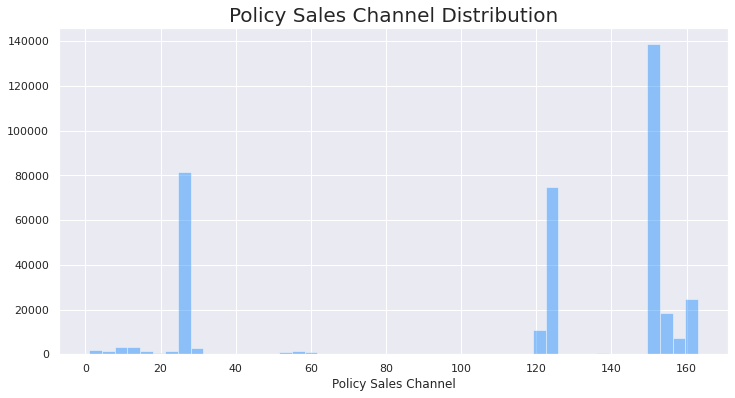

In [ ]:
# Ploting Distribution plot using Seaborn

plt.figure(figsize = (12,6))

sns.distplot(data['Policy_Sales_Channel'], kde = False)

plt.xlabel('Policy Sales Channel')

plt.title('Policy Sales Channel Distribution', fontsize = 20)

plt.show()

### Inference :
* Two channel clusters make up the majority of the policy sales channel.At 80, they are primarily divided.
* Since they are of the float type, it will be preferable to categorise them before one-hot encoding them. 

## Bivariate and  Multivariate Analysis

### Let us now analyse our features with target variable and extract more insights from our data visually.

* <b> Comparing Gender and Response Column.</b>

In [ ]:
gender_response = data.groupby(['Response','Gender']).size()
gender_response = gender_response.unstack()

In [ ]:
gender_response

Gender,Female,Male
Response,,
0,156835,177564
1,18185,28525


In [ ]:
pd.crosstab(index = data['Response'], columns = data['Gender'], normalize = 'index')

Gender,Female,Male
Response,,
0,0.469006,0.530994
1,0.389317,0.610683


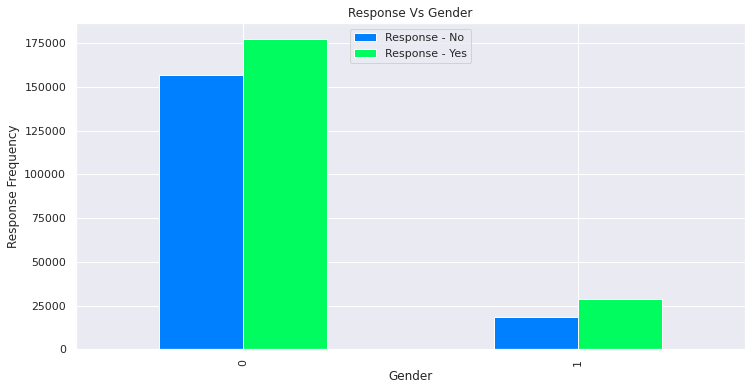

In [ ]:
# ploting bar graph for each response from each gender for the insurance

gender_response.plot(kind = 'bar', figsize = (12, 6))
plt.title("Response Vs Gender")
plt.xlabel('Gender')
plt.ylabel('Response Frequency')

plt.legend(['Response - No', 'Response - Yes'], loc = 'upper center')
plt.show()

### Inference :
* Compared to women, men are more likely to be interested in car insurance.

* Male respondents make up 61% of the respondents who expressed interest. 

* <b> Comparing Age and Response Column.</b>

* We will compare this using average age of the consumers

In [ ]:
age_response = data.groupby(['Response'])['Age'].agg(np.mean)

In [ ]:
age_response

Response
0    38.178227
1    43.435560
Name: Age, dtype: float64

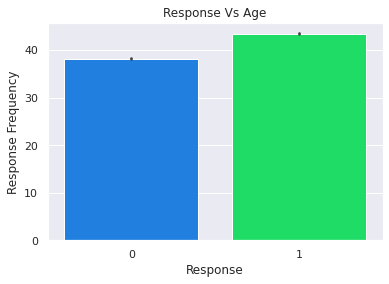

In [ ]:
# ploting bar graph for each response from each Age for the insurance

sns.barplot(x = data['Response'], y = data['Age'])
plt.title("Response Vs Age")
plt.xlabel('Response')
plt.ylabel('Response Frequency')

plt.show()

### Inference :
* The average age of customers who are interested in vehicle insurance is 43 years old, while customers who are not interested are 38 years old.
* Indicating that younger customers are not interested in vehicle insurance.

* <b> Comparing Age and Previously Insured Column.</b>

* For this also we will compare this using average age of the consumers

In [ ]:
age_prev_ins = data.groupby(['Previously_Insured'])['Age'].agg(np.mean)

In [ ]:
age_prev_ins

Previously_Insured
0    42.45564
1    34.52684
Name: Age, dtype: float64

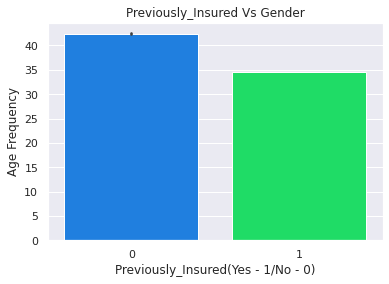

In [ ]:
# ploting bar graph for each Previously Insured from each gender for the insurance

sns.barplot(x = data['Previously_Insured'], y = data['Age'])
plt.title("Previously_Insured Vs Gender")
plt.xlabel('Previously_Insured(Yes - 1/No - 0)')
plt.ylabel('Age Frequency')

plt.show()

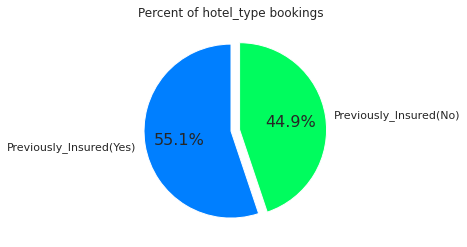

In [ ]:
plt.pie(list(age_prev_ins), labels=['Previously_Insured(Yes)','Previously_Insured(No)'], 
        autopct='%1.01f%%',startangle=90, explode= (0, 0.1))

plt.title('Percent of hotel_type bookings')


plt.show()

### Inference :
* The average age of customers with auto insurance is 34.5 while the average age of customers without auto insurance is 42.4.
* It is indicating that younger customers are more likely to have auto insurance than older ones. 

* <b> Comparing Response and Previously Insured Column.</b>

In [ ]:
response_prev_ins = data.groupby(['Response','Previously_Insured']).size()
response_prev_ins = response_prev_ins.unstack()

In [ ]:
response_prev_ins

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


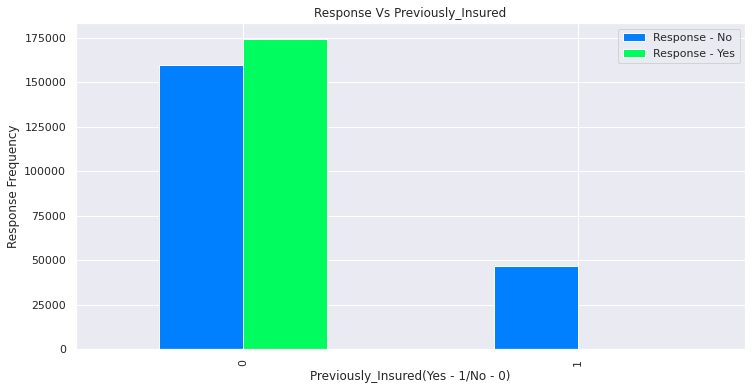

In [ ]:
# ploting bar graph for each response from each Previously Insured for the insurance

response_prev_ins.plot(kind = 'bar', figsize = (12, 6))
plt.title("Response Vs Previously_Insured")
plt.xlabel('Previously_Insured(Yes - 1/No - 0)')
plt.ylabel('Response Frequency')

plt.legend(['Response - No', 'Response - Yes'])
plt.show()

### Inference :
* Almost all customers who currently have a car insurance are not interested in getting another one, compared to all customers who do not.
* And roughly 25% of them are interested in buying car insurance. 

* <b> Comparing Response and Vehicle Age Column.</b>

In [ ]:
response_veh_age = data.groupby(['Response','Vehicle_Age']).size()
response_veh_age = response_veh_age.unstack().T

In [ ]:
response_veh_age.T

Vehicle_Age,0,1,2
Response,,,
0,165510,157584,11305
1,34806,7202,4702


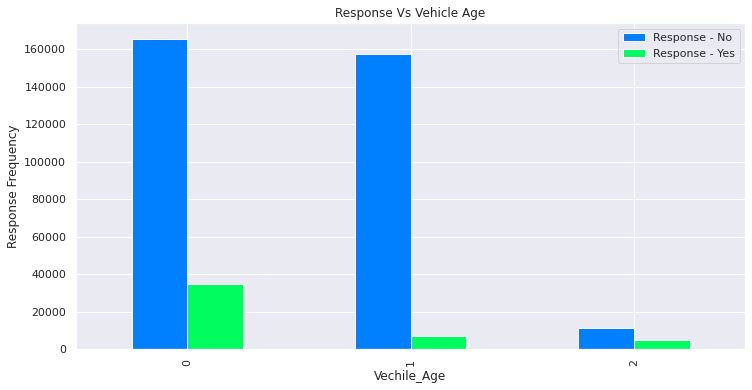

In [ ]:
# ploting bar graph for each response from each Vechile Age for the insurance

response_veh_age.plot(kind = 'bar', figsize = (12, 6))
plt.title("Response Vs Vehicle Age")
plt.xlabel('Vechile_Age')
plt.ylabel('Response Frequency')

plt.legend(['Response - No', 'Response - Yes'])
plt.show()

### Inference :
* Age range of vehicles Customers with newer cars are less likely to be interested in purchasing auto insurance.

* Customers with vehicles older than two years are more likely to be interested in purchasing auto insurance. 

* <b> Comparing Response and Vehicle Damage Column.</b>

In [ ]:
response_veh_damage = data.groupby(['Response','Vehicle_Damage']).size()
response_veh_damage = response_veh_damage.unstack().T

In [ ]:
response_veh_damage

Response,0,1
Vehicle_Damage,,
0,187714,982
1,146685,45728


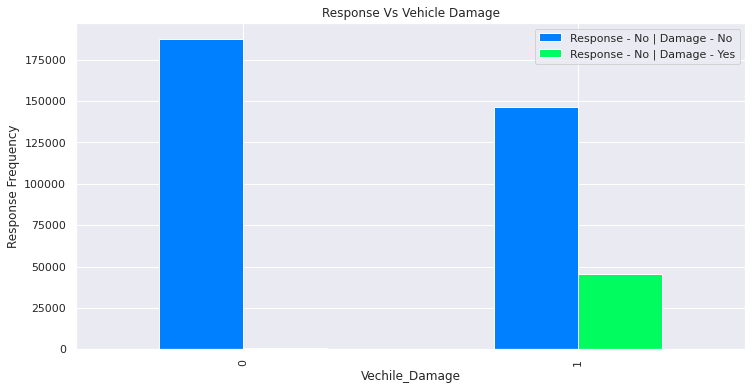

In [ ]:
# ploting bar graph for each response from each Vehicle Damage for the insurance

response_veh_damage.plot(kind = 'bar', figsize = (12, 6))
plt.title("Response Vs Vehicle Damage")
plt.xlabel('Vechile_Damage')
plt.ylabel('Response Frequency')

plt.legend(['Response - No | Damage - No', 'Response - No | Damage - Yes', 
            'Response - Yes | Damage - No', 'Response - Yes | Damage - Yes'])
plt.show()

### Inference :
* Customers who own a newer car are more likely to get their vehicle insured,  this could indicate that insurance companies should collaborate with dealerships to offer a vehicle and insurance bundle. 

* <b> Comparing Vehicle Age and Vehicle Damage Column.</b>

In [ ]:
veh_age_damage = data.groupby(['Response','Vehicle_Damage', 'Vehicle_Age']).size()
veh_age_damage = veh_age_damage.unstack().T

In [ ]:
veh_age_damage

Response               0               1         
Vehicle_Damage         0        1      0        1
Vehicle_Age                                      
0                71495.0  94015.0  596.0  34210.0
1               116204.0  41380.0  386.0   6816.0
2                   15.0  11290.0    NaN   4702.0

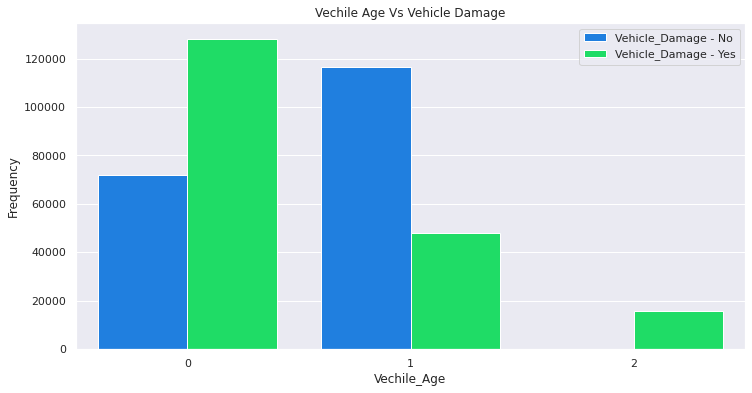

In [ ]:
# ploting bar graph for each Vehicle Age VS Vehicle Damage for the insurance

plt.figure(figsize = (12, 6))
sns.countplot(data['Vehicle_Age'], hue = data['Vehicle_Damage'])
plt.title("Vechile Age Vs Vehicle Damage")
plt.xlabel('Vechile_Age')
plt.ylabel('Frequency')

plt.legend(['Vehicle_Damage - No', 'Vehicle_Damage - Yes'])
plt.show()

### Inference :
* Vehicles older than two years are more likely to have had vehicle damage.
* The younger the vehicle, the less likely it has vehicle damage.

* <b> Comparing Annual_Premium with different columns and extract the relationship between them</b>

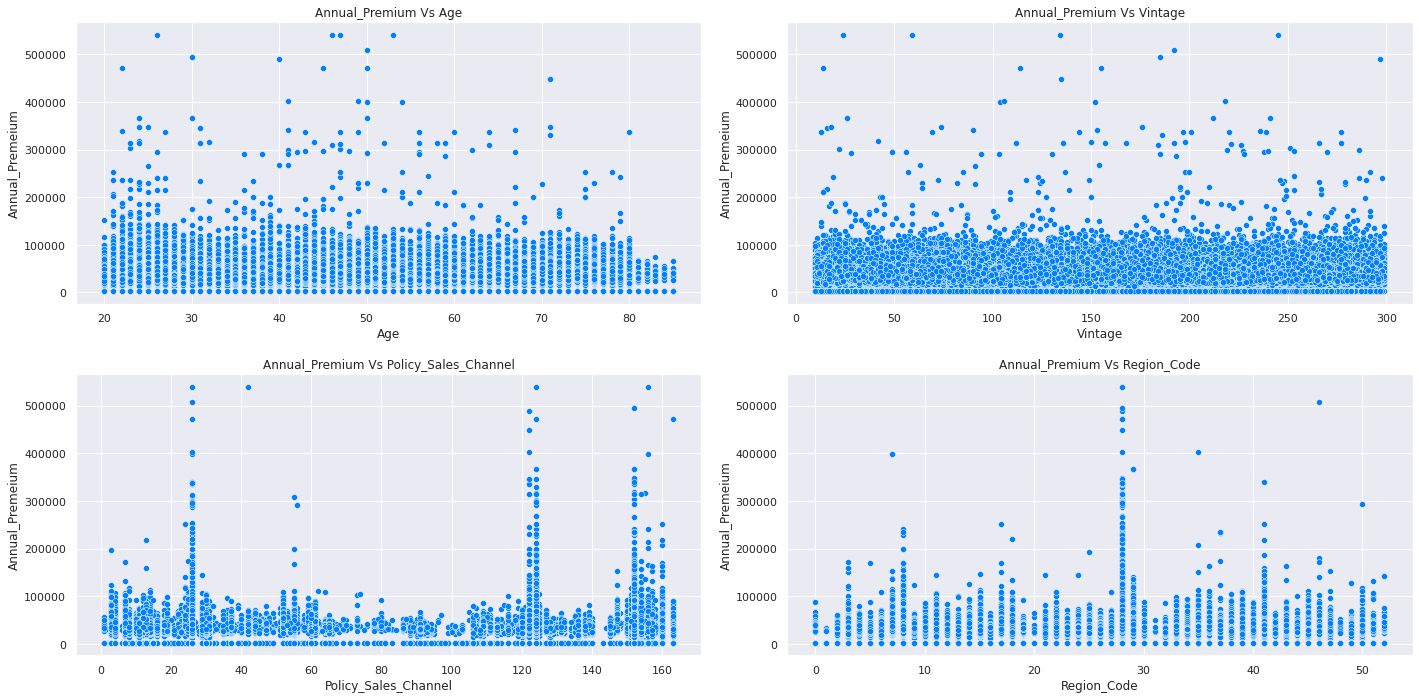

In [ ]:
cols = ['Age', 'Vintage', 'Policy_Sales_Channel', 'Region_Code']
n = 1
plt.figure(figsize = (20, 10))
for i in cols:
    
    
    plt.subplot(2,2,n)
    n = n + 1 
    
    sns.scatterplot(x = data[i], y = data['Annual_Premium'])
    
    plt.title("Annual_Premium Vs " + i)
    plt.xlabel(i)
    
    plt.ylabel('Annual_Premeium')
    plt.tight_layout()

### Inference :
* we can see that there is almost same annual premium which is below 200000 in all age group but the premiums of higher values are done by the age group of 40 -60.
* And there is not that much of difference in vintage almost every age group has customers of same rate.
* Policy channel 26, 124, 152, 156, 160 has the most number of annual premium collections.
* Region code 8, 28, 46 has the customers for the premium collections.

## <b>Checking Correlation in the whole dataset</b>

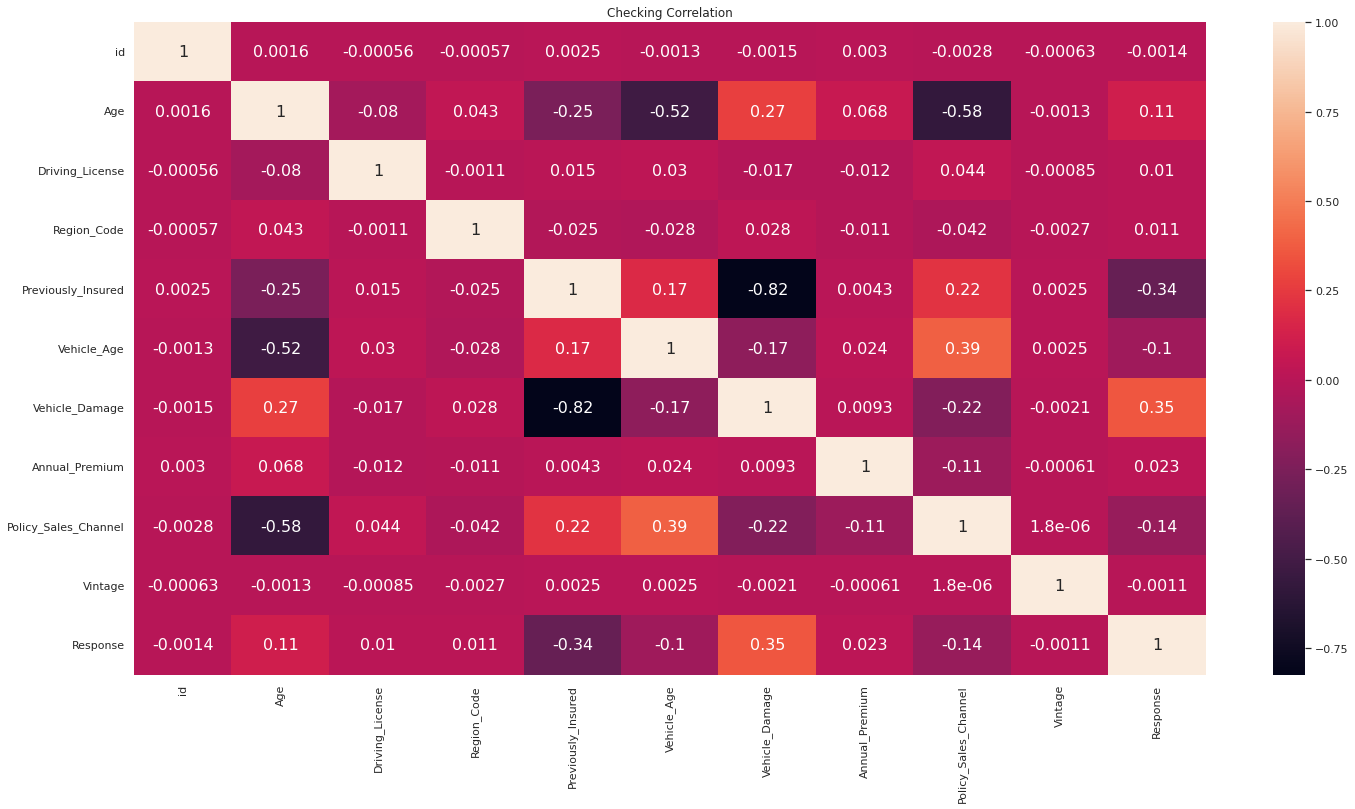

In [ ]:
# Checking Correlation

plt.figure(figsize=(24,12))

cor = data.corr() # getting correlation using corr() function

sns.heatmap(cor, annot=True, annot_kws={"size":16})

plt.title("Checking Correlation")
plt.show()

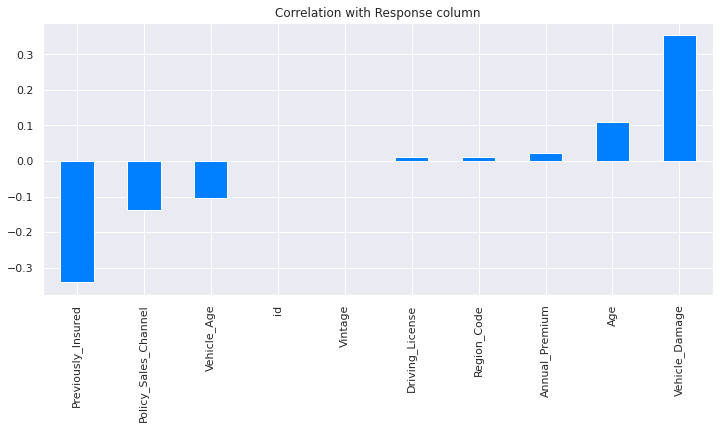

In [ ]:
# Checking Correlation with target variable

plt.figure(figsize=(12,5))
# using corrwith to check the correlation with Response column
# Ploting bar chart to visualize the result

data.corrwith(data['Response']).sort_values().drop('Response').plot(kind='bar')

plt.title('Correlation with Response column')

plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Calling the finction with threshold value 0.9.

corr_features = correlation(data, 0.9)
print('Number of correlated features :',len(set(corr_features))) # getting the length of the number of correlated features

Number of correlated features : 0


In [ ]:
print('Correlated Features :')
corr_features

Correlated Features :


set()

### Inference :
* As we can see that there is no correlated features 

### Checking Data types again

In [ ]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

* Here we can see that gender coulmn is in string format let us convert tp numeric using label encoder

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['Gender'])
 
# printing label
label

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
data['Gender'] = label
print(data.dtypes)
print('\nCount For Each Gender')
data['Gender'].value_counts()

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Count For Each Gender


1    206089
0    175020
Name: Gender, dtype: int64

In [ ]:
# Again checking our shape of data

print('shape of data :',data.shape)

# printing the number of numerical features and number of categorical features 

num_col = data.select_dtypes(include = 'number')
print("\nThe number of Numerical columns are:",len(num_col.columns))

cat_col = data.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

shape of data : (381109, 12)

The number of Numerical columns are: 12

The number of Categorical columns are: 0


* now we have total 12 columns and all are Numeric columns and we will drop Id column and after removal we will have 11 columns 
* 10 features and 1 target variable.

In [ ]:
data.drop(['id'], axis = 1, inplace = True)

In [ ]:
print('shape of data :',data.shape)

shape of data : (381109, 11)


* 10 features and 1 target variable.

### Conclusions till here:
* Customers aged 30 to 60 are more likely to purchase insurance.

* Customers who have a driver's licence are more likely to purchase insurance.

* Customers who have Vehicle Damage are more likely to purchase insurance.

* Variables such as Age, Previously insured, and Annual premium have a greater impact on the target variable. 

#### Seperating out features and target variables to x and y variables

In [ ]:
# first we make a copy of out data set to a new variable

new_data = data.copy()

In [ ]:
# seperating our data in feature and target varibles
x = new_data.drop(['Response'], axis = 1)

# taking our target variable 
y = new_data['Response']

In [ ]:
#!pip install xgboost

In [ ]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

# importing Logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# importing decision tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# importing randon forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# importing KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importing XGB Classifier from XGBOOST
from xgboost import XGBRFClassifier

# importing various matrics that well help us to analyze our classificationmodel
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# importing cross validation dependencies from sklearn
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

* <b> As we previously seen that our class data is imbalanced let us use Oversampling techique to balance our data before we go through model building.</b>
* <b> We will use SMOTE technique to balance our data</b>.

### Synthetic Minority Oversampling Technique (SMOTE)
* A statistical method for expanding the number of cases in our dataset in a balanced manner.
The component creates new instances from existing minority cases that you provide as input. 

In [ ]:
# Importing SMOTE from imblearn 
from imblearn.over_sampling import SMOTE

# Creating instance for SMOTE
smote = SMOTE()

# getting balanced data
new_x, new_y = smote.fit_resample(x, y)

### Spliting our data into train and test variables

In [ ]:
# using train test split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# giving 30% data for testing and 70% for training the model

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size = 0.3, random_state = 1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((468158, 10), (200640, 10), (468158,), (200640,))

In [ ]:
# list of models

models = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, XGBRFClassifier]

# function that will fit our models and train our models
def modeling(models):
    scores = []
    
    for i in models:
        
        if i == LogisticRegression:
            
            # Creating instance for our model
            model = LogisticRegression()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('Prediction by Logistic Regression :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))  
            
        elif i == KNeighborsClassifier:
            
            # Creating instance for our model
            model = KNeighborsClassifier()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by KNeighborsClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))
            
            
        
    
        elif i == DecisionTreeClassifier:
            
            # Creating instance for our model
            model = DecisionTreeClassifier()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('\nPrediction by DecisionTreeClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test))) 
            
            
            
        elif i == RandomForestClassifier:
            
             # Creating instance for our model
            model = RandomForestClassifier(n_estimators = 10 , max_depth = 10)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))
            
        elif i == XGBRFClassifier:
            
             # Creating instance for our model
            model = XGBRFClassifier()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestClassifier :\n', model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model.predict(x_test)))
            
     
    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['LogisticRegression', 'KNeighborsClassifier', 
                                       'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBOOST']))
    

In [ ]:
# Function that will calculate the accuracy, r2 and RMSE scores

def model_results(y_predicted):
    
    # Checking various matrics for our model    

    # Checking Accuracy
    accuracy = accuracy_score(y_test, y_predicted)

    # Checking Recall
    recall = recall_score(y_test, y_predicted)

    # Checking Precision
    precision = precision_score(y_test, y_predicted)

    # Checking f1 score
    f1_score_eval = f1_score(y_test, y_predicted)

    # Printing our classification report
    #print(classification_report(y_test, y_predicted))
        
    matrics_name = ['Accuracy', 'Recall', 'Precision', 'f1_score', 'y_predicted']
    matrics_value = [accuracy, recall, precision, f1_score_eval, y_predicted]
    
    total_matrics = dict(zip(matrics_name,matrics_value))

    df = pd.DataFrame(data = [total_matrics])
    return df

In [ ]:
def confusion_matrix_plot(df):
    
    plt.figure(figsize=(26, 13))
    n = 1
    #confusion_df = []
    
    total_confusion_matrix = []
    
    for i in range(len(df['y_predicted'])):
        confusion_matrix_eval =  confusion_matrix(y_test, df['y_predicted'][i], labels = [1,0])
    
    # Converting our confusion matrix to dataframe
        confusion_matrix_df = pd.DataFrame(data = confusion_matrix_eval,
                                           index =["Actual 1","Actual 0"],
                                           columns = ["Predicted 1", "Predicted 0"])
        print('\n' + 'Confusion Matrix for ' + df.index[i] + '\n',confusion_matrix_df)
        
        plt.subplot(3,3,n)
        n = n + 1 
        
        # Ploting Confusion Matrix for each model
        sns.heatmap(confusion_matrix_df, annot = True, cmap = 'Greens')
        
        plt.title('Confusion Matrix for ' + df.index[i], fontsize = 20)
        plt.tight_layout()
        

In [ ]:
def clf_report(df):
    for i in range(len(df)):
        print('\nClassification report : ' + df.index[i] +  '\n')
        
        print(classification_report(y_test, df['y_predicted'][i]))

### Model Building

In [ ]:
# Training our model and getting the predictions done by our different models
result = modeling(models)

Prediction by Logistic Regression :
 [0 1 0 ... 0 0 0]

Prediction by KNeighborsClassifier :
 [1 1 1 ... 0 1 0]

Prediction by DecisionTreeClassifier :
 [1 0 1 ... 0 0 0]

Prediction by RandomForestClassifier :
 [1 1 1 ... 0 0 0]

Prediction by RandomForestClassifier :
 [1 1 1 ... 0 0 0]


### Matric Evaluation

In [ ]:
# Getting the different matrics result
result

,Accuracy,Recall,Precision,f1_score,y_predicted
LogisticRegression,0.570056,0.486636,0.583796,0.530807,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, ..."
KNeighborsClassifier,0.804760,0.944760,0.737986,0.828669,"[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, ..."
DecisionTreeClassifier,0.878539,0.888035,0.871384,0.879631,"[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
RandomForestClassifier,0.835157,0.922341,0.785289,0.848315,"[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
XGBOOST,0.795450,0.958782,0.722594,0.824099,"[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, ..."


### Objective for the problem statement : 

* We are **focusing on recall score rather than accuracy** because this **problem statement is kind of scenario** in which the **owner of the insurance comany wants to retain the maximum customers who wants to buy an insurance** and for this we have to **get the maximum positive predictions done by the models** so that insurance companies can use the model to get the maximum revenue.


* And also we are not using ROC and AUC criterian in our analysis because we have binary classification problem and and we donot have to go for probability approach or probability for the class of predictions.


### Classification Reports

In [ ]:
# Getting the classification report for each model
clf_report(result)


Classification report : LogisticRegression

              precision    recall  f1-score   support

           0       0.56      0.65      0.60    100368
           1       0.58      0.49      0.53    100272

    accuracy                           0.57    200640
   macro avg       0.57      0.57      0.57    200640
weighted avg       0.57      0.57      0.57    200640


Classification report : KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.92      0.66      0.77    100368
           1       0.74      0.94      0.83    100272

    accuracy                           0.80    200640
   macro avg       0.83      0.80      0.80    200640
weighted avg       0.83      0.80      0.80    200640


Classification report : DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.89      0.87      0.88    100368
           1       0.87      0.89      0.88    100272

    accuracy                           0.

### Inference :


* As we can see that **recall rate of KNN is the heighest among all the models** which is **more than 94%**.


* Logistic regression is not performing up to the mark.


* **Random fores is doing a great job which is near to KNN in terms of Recall score.**


* **Decision Tree is also doin a descent job** but still its **recall value is less than 90%.**

### Confusion Matrix


Confusion Matrix for LogisticRegression
           Predicted 1  Predicted 0
Actual 1        48796        51476
Actual 0        34788        65580

Confusion Matrix for KNeighborsClassifier
           Predicted 1  Predicted 0
Actual 1        94733         5539
Actual 0        33634        66734

Confusion Matrix for DecisionTreeClassifier
           Predicted 1  Predicted 0
Actual 1        89045        11227
Actual 0        13143        87225

Confusion Matrix for RandomForestClassifier
           Predicted 1  Predicted 0
Actual 1        92485         7787
Actual 0        25287        75081

Confusion Matrix for XGBOOST
           Predicted 1  Predicted 0
Actual 1        96139         4133
Actual 0        36908        63460


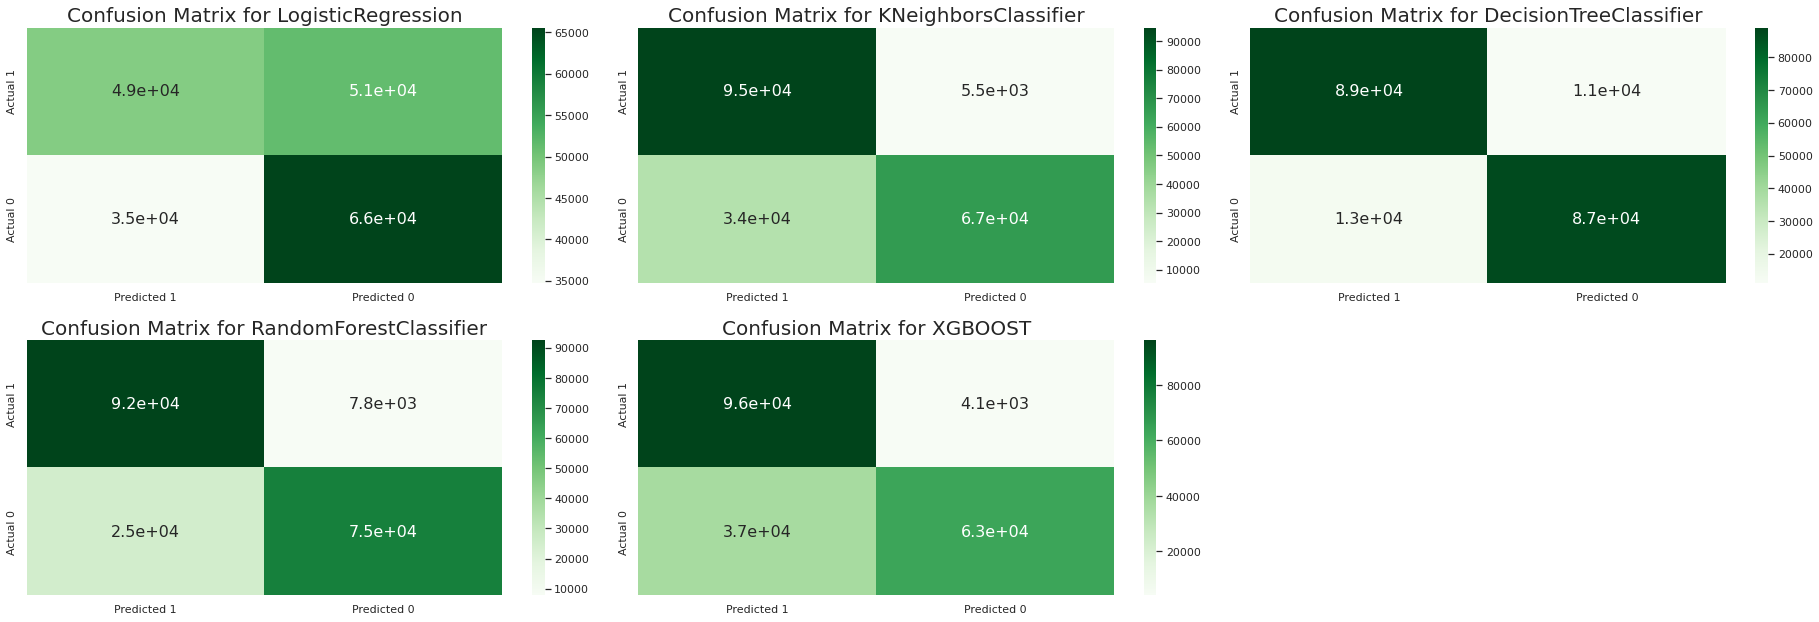

In [ ]:
# getting confusion matrix for each model
confusion_matrix_plot(result)

### Inference :

* We can see that the False Negetive rate of Logistic Regression is very high which is 41480 and for deciosion tree it is 11428 which is Very high and also for XGBOOST it is 10978 which is also very high and we are not taking these models as consideration.

* For KNN it is 5633 which very low than these models and for Random Forest it is 7468 which is also less but higher than KNN model.

### **From Here we can Conclude that KNN will be our best model to use for this whole problem statment**

#### **But we will use another approach to train our models using hyper parameter tuning and lets what we will get**

### Let us tune out Hyperparameters and check the results

In [ ]:
import xgboost

In [ ]:
# list of models
models = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, xgboost]

def hyperparameter_tuner(models):
    
# function that will fit our models and train our models
    scores = []
    for i in models:
        
        if i == LogisticRegression:
            print('\n LogisticRegression \n')
            # Creating instance for our model
            param_log_reg = {'C': [1, 0.5, 0.1, 5, 9],
                             'penalty':['l2','l1', 'elasticnet']}
            
            model = GridSearchCV(estimator = LogisticRegression(), 
                                 param_grid = param_log_reg, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
            print('\n\n Best Score by GridSearchCV : ',model.best_score_)
            
            best_param = model.best_estimator_
            
            # taking prediction from our model using .predict function
            print('\n\nPrediction by Tuned Logistic Regression :\n', best_param.predict(x_test))

            # appending scores to the list
            scores.append(model_results(best_param.predict(x_test)))
            
        elif i == KNeighborsClassifier:
            print('\n KNeighborsClassifier \n')
            # Creating instance for our model
            param_knn = {'n_neighbors':[5,7,9],
                         'weights':['uniform','distance'],
                         'p':[2, 1]}
            
            model = GridSearchCV(estimator = KNeighborsClassifier(), 
                                 param_grid = param_knn, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
            print('\n\n Best Score by GridSearchCV : ',model.best_score_)
            
            best_param = model.best_estimator_
            
            # taking prediction from our model using .predict function
            print('Prediction by Tuned KNN Classifier :\n', best_param.predict(x_test))

            # appending scores to the list
            scores.append(model_results(best_param.predict(x_test)))           
        
    
        elif i == DecisionTreeClassifier:
            print('\n DecisionTreeClassifier \n')
            # Creating instance for our model
            param_dt = {"max_depth": [None, 4,9,15,20,50],
                         "min_samples_leaf": [ 1,4,0.1,2,10],
                         "max_features" : [None, 0.2, 0.8, 2.0],
                         "min_samples_split": [2,9,15,25]}
            
            model = GridSearchCV(estimator = DecisionTreeClassifier(), 
                                 param_grid = param_dt, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
            print('\n\n Best Score by GridSearchCV : ',model.best_score_)
            
            best_param = model.best_estimator_
            
            # taking prediction from our model using .predict function
            print('Prediction by Tuned Decision Tree Classifier :\n', best_param.predict(x_test))

            # appending scores to the list
            
            scores.append(model_results(best_param.predict(x_test))) 
            
            
            
        elif i == RandomForestClassifier:
            
            # Creating instance for our model
            
            print('\n RandomForestClassifier \n')
            param_rf = {"n_estimators":[5,10,15],
                        "max_depth": [2, 3, 4],
                        "min_samples_leaf": [1, 3, 5],
                        "min_samples_split" : [2, 3, 5],
                        "max_features" : ['auto', 'sqrt', 'log2'],
                        "criterion": ['gini', 'entropy']}
            
            model = GridSearchCV(estimator = RandomForestClassifier(), 
                                 param_grid = param_rf, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ',model.best_params_)
            
            print('\n\n Best Score by GridSearchCV : ',model.best_score_)
            
            best_para= model.best_estimator_
            
            # taking prediction from our model using .predict function
            
            print('Prediction by Tuned Random Forest Classifier :\n', best_para.predict(x_test))
            
            #appending scores to the list
            scores.append(model_results(best_para.predict(x_test))) 
            
        elif i == xgboost:
            # Creating instance for our model
            
            print('\n XGBClassifier \n')
            param_xgb = {"n_estimators":[5,10,15],
                         'learning_rate' : [0.05, 0.10, 0.15],
                         'max_depth' : [5, 7, 9],
                         'min_child_weight' : [3, 5, 7],
                         'gamma' : [0.0, 0.1, 0.2],
                         'colsample_bytree' : [0.3, 0.5, 0.7]
                        }
            
            model = GridSearchCV(estimator = xgboost.XGBClassifier(), 
                                 param_grid = param_xgb, 
                                 cv = 3, n_jobs = -1 , 
                                 verbose = 1, scoring = 'recall')
            
            # fitting our model using .fit funtion
            
            model.fit(x_train,y_train)
            
            print('\n\n Best parameters by GridSearchCV : ', model.best_params_)
            
            print('\n\n Best Score by GridSearchCV : ', model.best_score_)
            
            best_para= model.best_estimator_
            
            # taking prediction from our model using .predict function
            
            print('Prediction by Tuned XGBClassifier :\n', best_para.predict(x_test))
            
            #appending scores to the list
            scores.append(model_results(best_para.predict(x_test)))
            
     
    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['LogisticRegression', 'KNeighborsClassifier', 
                                       'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBOOST']))
    

### Model Buiding Using Hyperparameter Tuning

In [ ]:
# Training our model and getting the predictions done by our different models
result_1 = hyperparameter_tuner(models)


 LogisticRegression 

Fitting 3 folds for each of 15 candidates, totalling 45 fits


 Best parameters by GridSearchCV :  {'C': 0.1, 'penalty': 'l2'}


 Best Score by GridSearchCV :  0.6433181588495889


Prediction by Tuned Logistic Regression :
 [1 1 1 ... 0 1 0]

 KNeighborsClassifier 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


 Best parameters by GridSearchCV :  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


 Best Score by GridSearchCV :  0.9504371501542271
Prediction by Tuned KNN Classifier :
 [1 1 0 ... 0 0 0]

 DecisionTreeClassifier 

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


 Best parameters by GridSearchCV :  {'max_depth': 50, 'max_features': 0.2, 'min_samples_leaf': 0.1, 'min_samples_split': 9}


 Best Score by GridSearchCV :  0.9704560810659956
Prediction by Tuned Decision Tree Classifier :
 [1 1 1 ... 0 1 0]

 RandomForestClassifier 

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


 Best parameters by GridS

### Matrics Evaluation

In [ ]:
# Training our model and getting the predictions done by our different models after Hyper parameter tuning
result_1

,Accuracy,Recall,Precision,f1_score,y_predicted
LogisticRegression,0.777352,0.880625,0.729744,0.798116,"[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
KNeighborsClassifier,0.835506,0.969284,0.764593,0.854856,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
DecisionTreeClassifier,0.675434,0.981869,0.608654,0.751474,"[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, ..."
RandomForestClassifier,0.793072,0.908409,0.738021,0.814398,"[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
XGBOOST,0.819936,0.950126,0.753738,0.840614,"[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."


### Inference :


* As we can see that **recall rate of KNN is now slightly better than before but **Decision Tree after hyper parameter tuning it is doing a great job and give us the recall score of 98%.**


* And still Logistic regression is not performing up to the mark.


* **Recall rate of Random forest is decreased after hyperparameter tuning which is from 93% to 90%**


* **If we compare KNN and XGBOOST classifiers we can conclude that KNN is still better than XGBOOST**

* **But finally we got a model from here if we consider Recall rate than it will be the Decision tree.**

#### **Let us compare our results more with further evaluations**.

### Classification Report

In [ ]:
# Getting the classification report for each model
clf_report(result_1)


Classification report : LogisticRegression

              precision    recall  f1-score   support

           0       0.85      0.67      0.75    100368
           1       0.73      0.88      0.80    100272

    accuracy                           0.78    200640
   macro avg       0.79      0.78      0.77    200640
weighted avg       0.79      0.78      0.77    200640


Classification report : KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.96      0.70      0.81    100368
           1       0.76      0.97      0.85    100272

    accuracy                           0.84    200640
   macro avg       0.86      0.84      0.83    200640
weighted avg       0.86      0.84      0.83    200640


Classification report : DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.95      0.37      0.53    100368
           1       0.61      0.98      0.75    100272

    accuracy                           0.

### Confusion Matrix


Confusion Matrix for LogisticRegression
           Predicted 1  Predicted 0
Actual 1        88302        11970
Actual 0        32702        67666

Confusion Matrix for KNeighborsClassifier
           Predicted 1  Predicted 0
Actual 1        97192         3080
Actual 0        29924        70444

Confusion Matrix for DecisionTreeClassifier
           Predicted 1  Predicted 0
Actual 1        98454         1818
Actual 0        63303        37065

Confusion Matrix for RandomForestClassifier
           Predicted 1  Predicted 0
Actual 1        91088         9184
Actual 0        32334        68034

Confusion Matrix for XGBOOST
           Predicted 1  Predicted 0
Actual 1        95271         5001
Actual 0        31127        69241


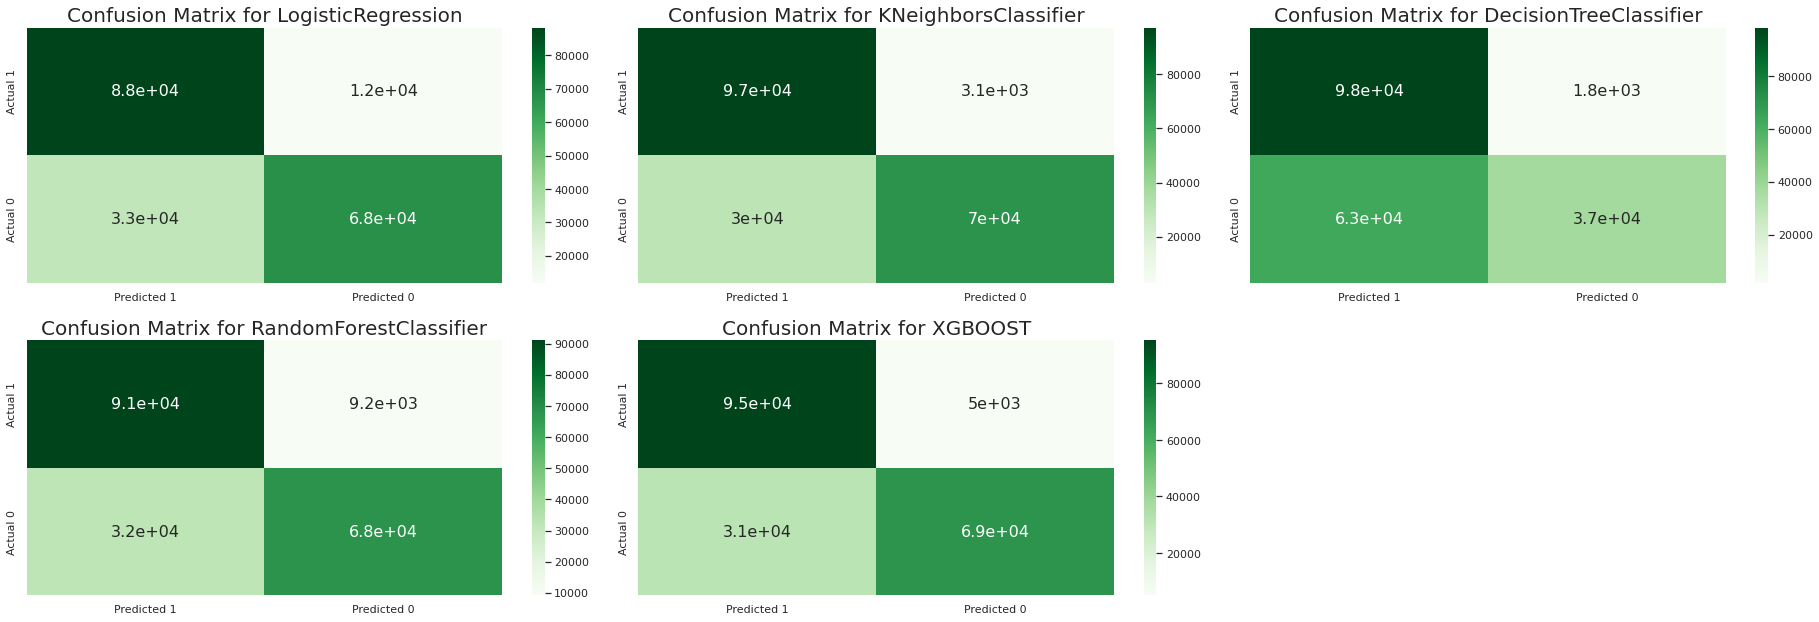

In [ ]:
# getting confusion matrix for each model
confusion_matrix_plot(result_1)

### Inference :

* We can see that after **hyper parameter tuning the False Negetive rate of Logistic Regression is 11970, which is highest among the all models and Random forest yielded false positive of 9184 which is also high.**


* If we comapre **false positive rate of KNN and XGBOOST** they giving us **3080 and 5001** respectiely which is lower than Logistic and Random Forest models but higher than **Decision Tree*


* **Decision Tree Classifier** providing us the **lowest False Positive Rate of 1818** among all the models.


* **But if we consider good recall good accuracy and descent Fasle Positive rate than KNN Doing a great job with (96% of recall and 83% of accuracy and 3080 false positive rate) if all parameter we consider than our final model should be KNN Classifier.**


* **But if we rely on purely Recall Rate than we should go for Decision Tree Regressor.**

#### **As we can improve KNN Classifier Model more using more hyper parameter tuning which can give us more desired results which will be more helpful.**

### Conclusions :

* We can observe from our Initial analysis from distribution of our features and outlier detection and whole EDA analysis we can conclude that:
* Customers who have never had a vehicle damaged are only 0.5 percent interested in vehicle insurance.
* Vehicles less than one year old are more likely to have insurance, with 66 percent of those insured, and vehicles older than one year but less than two years old are 33 percent insured.

### **All Model Interpretation and conclusion:**

#### **From Here also we can Conclude that KNN Classifier will be our best model to use for this whole problem statment so that Insuarance Companies can easily get the proper idea about the customers they have to target and how to target so that they can retain most of the customers and generate higher revenue.**

### Future Work Suggestions:

* Insurance Comapnies should promot and provide more customer friendly insuarance.
* Benefits for clients with vehicles older than two years.
* And for analysis there should be more parameters for the analysis more some more features will help the analysis to be more explainatory.